In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import pandas to read the csv file
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib

In [ ]:
#reading the y.txt file which contains labels
y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Runtime Complexity", "Node Number", "Language"])

In [ ]:
y

,Runtime Complexity,Node Number,Language
0,O(1),nodes0,C
1,O(2n),nodes0,C
2,O(2n),nodes1,C
3,O(logN),nodes0,C
4,O(logN),nodes1,C
...,...,...,...
735,O(NlogN),nodes5,Java
736,O(NlogN),nodes6,Java
737,O(NlogN),nodes7,Java
738,O(NlogN),nodes8,Java


In [ ]:
x = np.load('/content/drive/MyDrive/x.npy')

In [ ]:
df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

In [ ]:
df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
df['Complexity'] = df_y['Complexity']
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Complexity
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840,O(1)
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719,O(2n)
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227,O(2n)
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,O(logN)
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,O(logN)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,O(NlogN)
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,O(NlogN)
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,O(NlogN)
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,O(NlogN)


In [ ]:
df['Complexity'].value_counts()

O(N)          375
O(N2)         165
O(NlogN)      100
O(logN)        31
O(N3)          27
O(Nd)          22
O(2n)           7
O(1)            6
O(N!)           4
O(sqrt(N))      3
Name: Complexity, dtype: int64

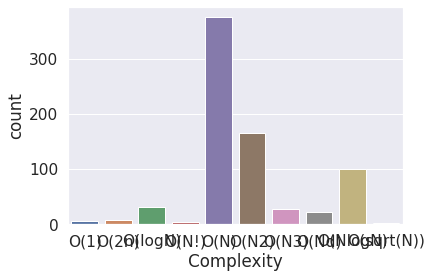

In [ ]:
import seaborn as sns
sns.countplot(df['Complexity'])

# **Resampling - Oversampling**

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Complexity'] == 'O(N)')] 
df_minority_1 = df[(df['Complexity'] == 'O(N2)')] 
df_minority_2 = df[(df['Complexity'] == 'O(NlogN)')] 
df_minority_3 = df[(df['Complexity'] == 'O(logN)')] 
df_minority_4 = df[(df['Complexity'] == 'O(N3)')]
df_minority_5 = df[(df['Complexity'] == 'O(Nd)')]
df_minority_6 = df[(df['Complexity'] == 'O(2n)')]
df_minority_7 = df[(df['Complexity'] == 'O(1)')]
df_minority_8 = df[(df['Complexity'] == 'O(N!)')]
df_minority_9 = df[(df['Complexity'] == 'O(sqrt(N))')]

# upsample minority class
minority = [df_minority_1, df_minority_2, df_minority_3, df_minority_4, df_minority_5, df_minority_6, df_minority_7, df_minority_8, df_minority_9]
temp = []
for i in minority:
  df_minority_upsampled = resample(i, 
                                  replace=True,    # sample with replacement
                                  n_samples= 375, # to match majority class
                                  random_state=42)  # reproducible results
  temp.append(df_minority_upsampled)
# Combine majority class with upsampled minority class
df_upsampled = df_majority
for i in temp:
  df_upsampled = pd.concat([i, df_upsampled])

In [ ]:
df_upsampled['Complexity'].value_counts()

O(sqrt(N))    375
O(N!)         375
O(1)          375
O(2n)         375
O(Nd)         375
O(N3)         375
O(logN)       375
O(NlogN)      375
O(N2)         375
O(N)          375
Name: Complexity, dtype: int64

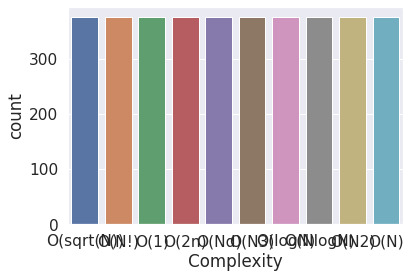

In [ ]:
sns.countplot(df_upsampled['Complexity'])

In [ ]:
df = df_upsampled
# df = oversampled
factor = pd.factorize(df['Complexity'])
df.Complexity= factor[0]
definitions = factor[1]
print(df.Complexity.head())
print(definitions)

426    0
118    0
426    0
426    0
118    0
Name: Complexity, dtype: int64
Index(['O(sqrt(N))', 'O(N!)', 'O(1)', 'O(2n)', 'O(Nd)', 'O(N3)', 'O(logN)',
       'O(NlogN)', 'O(N2)', 'O(N)'],
      dtype='object')


In [ ]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:128].values
y = df.iloc[:,128].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[-5.83184287e-02  3.71529967e-01 -2.88323965e-02  1.55028060e-01
   3.11014682e-01  1.00550026e-01  5.99360764e-02 -3.60761136e-01
   1.44105852e-01  3.35489400e-02 -3.26490730e-01 -1.46469802e-01
  -1.58249080e-01  8.42799172e-02 -1.56572074e-01 -6.25618100e-02
   1.79115199e-02 -6.21027872e-02 -4.91600335e-02  3.89916211e-01
  -1.46600425e-01  8.72108266e-02 -6.90339282e-02 -1.86637864e-01
   4.93713245e-02  4.02110219e-02  1.68428034e-01  1.20966127e-02
  -5.01116753e-01  2.01332048e-01 -1.36490002e-01 -5.06071329e-01
   1.30972713e-01  3.99992436e-01 -5.79397716e-02  2.12425098e-01
   2.67079026e-01  7.10954294e-02  3.29857349e-01  2.58917511e-01
   1.54078141e-01 -3.46699953e-01  5.03761582e-02 -1.37354985e-01
  -1.46855399e-01  2.39136890e-01  1.41890749e-01 -2.20331624e-01
   1.15752794e-01  2.84888089e-01 -1.10822842e-01 -4.63338494e-01
   2.44946837e-01  4.53784674e-01  1.73191175e-01 -9.71864909e-02
   1.07007056e-01  1.23845637e-01  4.40136716

In [ ]:
y = df['Complexity']

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
classifier.feature_importances_

array([0.00205803, 0.00237477, 0.00239716, 0.00552286, 0.01471145,
       0.00212888, 0.00694612, 0.00385987, 0.00483586, 0.05223379,
       0.00314202, 0.01011986, 0.0026974 , 0.00342127, 0.00481718,
       0.00596554, 0.02177389, 0.00769698, 0.00957972, 0.00661188,
       0.0065447 , 0.01711189, 0.00281484, 0.00065235, 0.00397032,
       0.01659198, 0.00645448, 0.00492351, 0.00911513, 0.00263961,
       0.00668424, 0.00254609, 0.00942314, 0.00114929, 0.00401649,
       0.00311682, 0.01076222, 0.00093524, 0.00571821, 0.00231515,
       0.00631009, 0.00884347, 0.01176997, 0.01096665, 0.00269361,
       0.0063827 , 0.00585598, 0.01104356, 0.00338085, 0.00250772,
       0.00783922, 0.00411885, 0.01797771, 0.00804573, 0.00554753,
       0.01117641, 0.01067285, 0.0054516 , 0.04774338, 0.00467235,
       0.01002134, 0.00337058, 0.00185311, 0.00475257, 0.00407477,
       0.01380346, 0.00860686, 0.00961504, 0.00298574, 0.00746593,
       0.01191068, 0.00910007, 0.0086921 , 0.00342453, 0.00418

In [ ]:
num_classes = len(set(df_upsampled['Complexity']))
num_classes

10

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
reversefactor = dict(zip(range(num_classes),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

<BarContainer object of 128 artists>

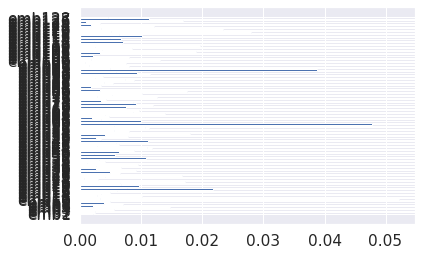

In [ ]:
from matplotlib import pyplot as plt
plt.barh(df.columns[0:128], classifier.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

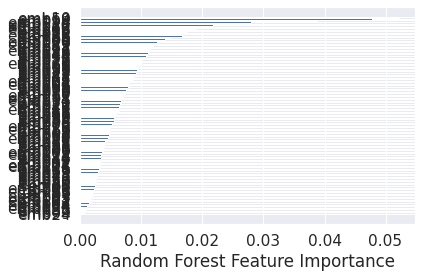

In [ ]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(df.columns[0:128][sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
import warnings as wr
wr.filterwarnings('ignore')
perm_importance = permutation_importance(classifier, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

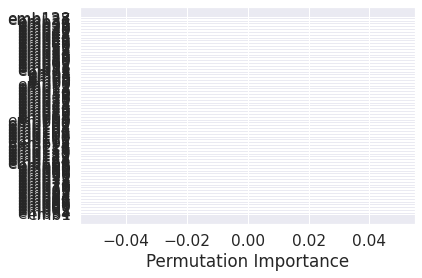

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[0:128][sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

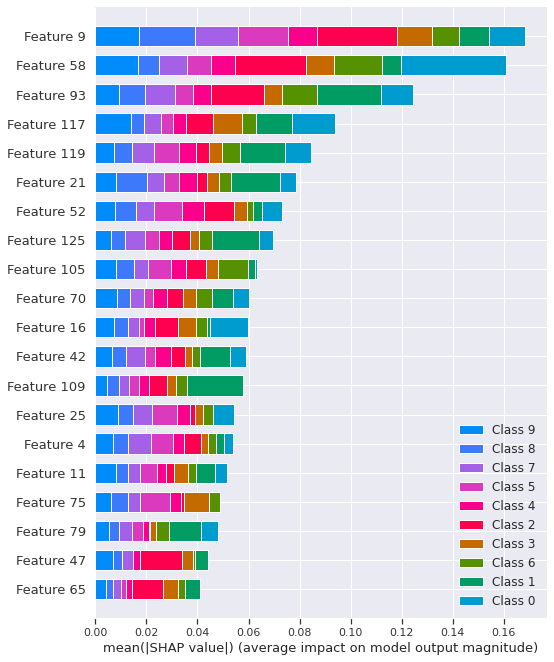

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

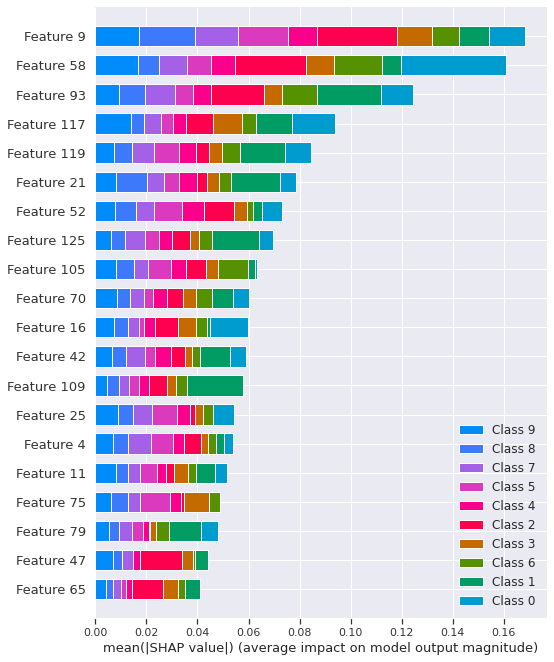

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import numpy as np
vals= np.abs(shap_values).mean(0)

feature_importance = pd.DataFrame(list(zip(df.columns[0:128], sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
feature_importance

,col_name,feature_importance_vals
9,emb10,15.797250
58,emb59,15.066957
93,emb94,11.663086
117,emb118,8.820279
119,emb120,7.917465
...,...,...
37,emb38,0.337182
23,emb24,0.296494
124,emb125,0.278795
81,emb82,0.265759


In [ ]:
new_df = pd.DataFrame()

In [ ]:
c=0
for row, col in feature_importance.iterrows():
  new_df[col[0]] = df[col[0]]
  c+=1
  if c== 20:
    break
new_df['Complexity'] = df['Complexity']
new_df

,emb10,emb59,emb94,emb118,emb120,emb22,emb53,emb126,emb106,emb71,...,emb43,emb110,emb26,emb5,emb12,emb76,emb80,emb48,emb66,Complexity
426,0.033549,0.044014,-0.040886,0.197985,-0.061677,0.087211,0.244947,0.006856,-0.254759,-0.255383,...,0.050376,-0.086385,0.040211,0.311015,-0.146470,-0.419865,0.218304,-0.220332,-0.141788,0
118,0.061646,0.049084,-0.170591,0.218176,0.098315,-0.046915,0.133835,0.119077,-0.018463,-0.283065,...,0.137511,-0.380507,-0.016526,0.198030,-0.527586,-0.146912,0.075390,-0.249952,-0.261316,0
426,0.033549,0.044014,-0.040886,0.197985,-0.061677,0.087211,0.244947,0.006856,-0.254759,-0.255383,...,0.050376,-0.086385,0.040211,0.311015,-0.146470,-0.419865,0.218304,-0.220332,-0.141788,0
426,0.033549,0.044014,-0.040886,0.197985,-0.061677,0.087211,0.244947,0.006856,-0.254759,-0.255383,...,0.050376,-0.086385,0.040211,0.311015,-0.146470,-0.419865,0.218304,-0.220332,-0.141788,0
118,0.061646,0.049084,-0.170591,0.218176,0.098315,-0.046915,0.133835,0.119077,-0.018463,-0.283065,...,0.137511,-0.380507,-0.016526,0.198030,-0.527586,-0.146912,0.075390,-0.249952,-0.261316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.474443,-0.091523,0.581903,0.420108,-0.713122,0.166231,0.044426,0.517843,-0.151703,-0.169107,...,0.089850,-0.267641,0.150161,0.609881,0.227841,-0.311367,-0.330873,-0.091890,0.386988,9
604,0.045316,-0.194377,-0.254264,0.486741,-0.113071,0.487490,0.225835,0.218456,-0.263121,-0.295115,...,-0.075760,-0.178207,0.285817,0.421603,-0.007766,-0.174743,0.157294,0.000964,0.656859,9
605,-0.127935,-0.068997,-0.081941,0.296270,-0.299855,0.371030,0.402610,0.235012,-0.039719,-0.363566,...,-0.044355,-0.008018,0.351663,0.729766,-0.228277,-0.250069,0.119876,-0.191410,0.414843,9
606,0.179867,-0.253822,0.284089,0.468238,-0.221097,0.282133,0.413344,0.274126,-0.053115,-0.040816,...,0.097985,0.338555,0.293608,0.156893,0.487673,-0.543423,0.162762,-0.096405,0.391761,9


In [ ]:
X = new_df.iloc[:,0:20].values
y = new_df.iloc[:,20].values
X.shape,y.shape

((3750, 20), (3750,))

In [ ]:
y = df['Complexity']
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
reversefactor = dict(zip(range(num_classes),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Classes'], colnames=['Predicted Classes']))
out = pd.crosstab(y_test, y_pred, rownames=['Actual Classes'], colnames=['Predicted Classes'])
# print(type(out))

Predicted Classes  O(1)  O(2n)  O(N!)  O(N)  O(N2)  O(N3)  O(Nd)  O(NlogN)  \
Actual Classes                                                               
O(1)                 95      0      0     0      0      0      0         0   
O(2n)                 0     92      0     0      0      0      0         0   
O(N!)                 0      0    105     0      0      0      0         0   
O(N)                  1      1      0    59     12      2      1         8   
O(N2)                 0      0      0     0     84      1      1         1   
O(N3)                 0      0      0     0      0    106      0         0   
O(Nd)                 0      0      0     0      0      0    101         0   
O(NlogN)              0      0      0     2      2      0      0        71   
O(logN)               0      0      0     0      0      0      0         0   
O(sqrt(N))            0      0      0     0      0      0      0         0   

Predicted Classes  O(logN)  O(sqrt(N))  
Actual Classes        

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 95,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  92,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 105,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,  59,  12,   2,   1,   8,   4,   0],
       [  0,   0,   0,   0,  84,   1,   1,   1,   0,   0],
       [  0,   0,   0,   0,   0, 106,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0,   0],
       [  0,   0,   0,   2,   2,   0,   0,  71,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  91,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  98]])

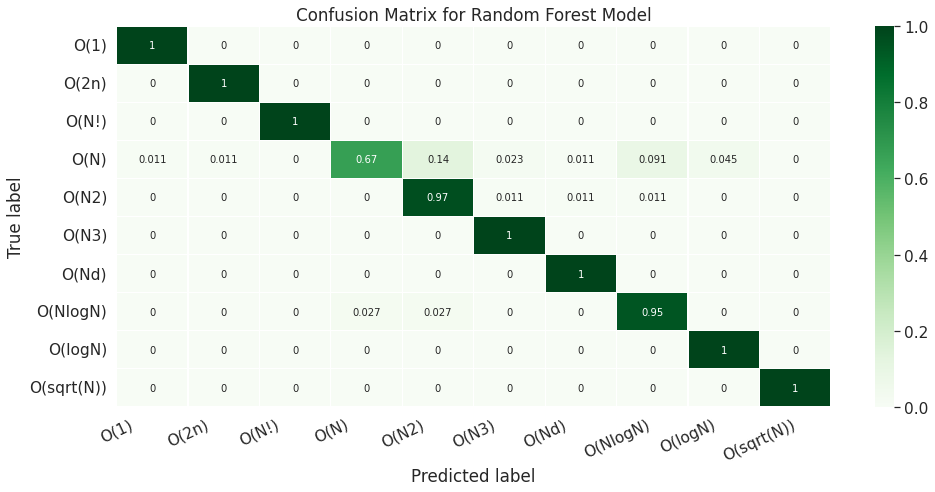

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(1)',  'O(2n)',  'O(N!)',  'O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)','O(sqrt(N))']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9616204690831557

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        O(1)       0.99      1.00      0.99        95
       O(2n)       0.99      1.00      0.99        92
       O(N!)       1.00      1.00      1.00       105
        O(N)       0.97      0.67      0.79        88
       O(N2)       0.86      0.97      0.91        87
       O(N3)       0.97      1.00      0.99       106
       O(Nd)       0.98      1.00      0.99       101
    O(NlogN)       0.89      0.95      0.92        75
     O(logN)       0.96      1.00      0.98        91
  O(sqrt(N))       1.00      1.00      1.00        98

    accuracy                           0.96       938
   macro avg       0.96      0.96      0.96       938
weighted avg       0.96      0.96      0.96       938



# **SMOTE**

In [ ]:
y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Runtime Complexity", "Node Number", "Language"])
x = np.load('/content/drive/MyDrive/x.npy')


df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])
df['Complexity'] = df_y['Complexity']
y = df['Complexity']

In [ ]:
df = df[ (df['Complexity'] == 'O(N)') | (df['Complexity'] == 'O(N2)')]

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.

X = df.iloc[:,0:128].values
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Complexity', axis=1), df['Complexity'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
# Smote for multiclass

In [ ]:
# y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Runtime Complexity", "Node Number", "Language"])
# x = np.load('/content/drive/MyDrive/x.npy')


# df = []
# for i in range(len(x)):
#   emb = x[i].tolist()
#   # emb.append(y[i])
#   df.append(emb)
# col = []
# for i in range(128):
#   col.append('emb'+str(i+1))
# # col.append('classes')
# df = pd.DataFrame(df, columns=col)

# df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])
# df['Complexity'] = df_y['Complexity']
# y = df['Complexity']

In [ ]:
# X = df.iloc[:,0:128].values
# factor = pd.factorize(df['Complexity'])
# df.Complexity= factor[0]
# definitions = factor[1]
# y = df.iloc[:,128].values

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# y = LabelEncoder().fit_transform(y)
# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [ ]:
# ValueError: Expected n_neighbors <= n_samples     6 neighbors <= 4 samples

# **Threshold Moving**

In [ ]:
y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Runtime Complexity", "Node Number", "Language"])
x = np.load('/content/drive/MyDrive/x.npy')


df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])
df['Complexity'] = df_y['Complexity']

#Splitting the data into independent and dependent variables
X = df.iloc[:,0:128].values
y = df.iloc[:,128].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

y = df['Complexity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

The independent features set: 
[[-5.46817556e-02  1.27175003e-01  3.66478041e-02  9.03529450e-02
   1.92497656e-01  4.35396768e-02 -6.03338443e-02 -3.76324058e-02
  -1.83834950e-03  1.16994865e-01  5.27923480e-02 -1.57576203e-01
   1.43596098e-01  3.71556468e-02  3.83224078e-02 -9.10438523e-02
   4.03349213e-02  2.11318843e-02  5.75276911e-02  1.80179939e-01
  -2.13484481e-01  2.17291340e-02 -8.47572088e-02 -1.31484851e-01
  -4.24665883e-02  5.63512109e-02 -7.74702728e-02  6.60680383e-02
  -1.48080543e-01  1.58492446e-01  2.89504752e-02 -2.75817037e-01
   1.91999123e-01  1.08052090e-01  7.15311542e-02  2.69077063e-01
   8.31059143e-02  2.38153219e-01  1.80793345e-01 -2.35307645e-02
   6.05866313e-02 -2.97051936e-01  4.65184972e-02 -6.35263324e-02
   1.51319560e-02  8.73206463e-03 -4.46680859e-02 -1.54379204e-01
   1.15279354e-01  2.65681446e-02 -1.46464109e-01 -3.65835801e-02
   1.16344631e-01  2.15480030e-01 -1.23131797e-02 -1.30555555e-01
   1.01317108e-01  1.83590040e-01 -5.54473996

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)   
rf_model.predict_proba(X_test) #probability of the class label

array([[0.01, 0.  , 0.  , ..., 0.06, 0.  , 0.  ],
       [0.  , 0.02, 0.  , ..., 0.1 , 0.  , 0.02],
       [0.  , 0.  , 0.03, ..., 0.24, 0.01, 0.01],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.01],
       [0.  , 0.02, 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.1 , 0.  , 0.  ]])

In [ ]:
# roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = rf_model.predict_proba(X_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)


# **Results**

---


0.5945 -> All classes

0.5888 -> Removing 4 classes <10

---

**Resampling**

0.8882 -> N, N2

0.8986 -> N, N2, NlogN, logN

0.9449 -> Removing 4 classes <10

0.9573 -> All classes

---

**SMOTE**

0.9734 -> N, N2

---

**Feature Importance**
0.9616204 -> All Classes

# **Results**

---
1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. Cohen Kappa Score
6. Roc auc Score
---
**Random Forest**

0.9573560767590619

0.9584976073991893

0.9573560767590619

0.9552754759579702

---
**Adaboost**

0.802771855010661

0.8534504944314486

0.802771855010661

0.8145437082907355

---
**XGBoost**

0.9658848614072495

0.965915211393339

0.9658848614072495

0.9649037802214644

0.9620538169314109

---
**KNN**

0.9008528784648188

0.9001685697973634

0.9008528784648188

0.8916125571931889

0.8896681342336884

---

**Logistic Regressiont**

0.9008528784648188

0.900135627354752

0.9008528784648188

0.8995841318871703

0.8897233666267618

---

**Naive Bayes**

0.4275053304904051

0.5715843473005865

0.4275053304904051

0.42702817370427987

0.3624604153007678

---